In [1]:

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from tqdm import tqdm

In [2]:
# def GLP(x, n, alpha):
#     return sp.special.genlaguerre(n, alpha)(x)

def GLP(x, n, alpha): # Generalized Laguerre polynomials
    L0 = np.ones(x.shape)
    L1 = 1.0 + alpha - x
    
    if n == 0:
        Ln = L0
    if n == 1:
        Ln = L1
    
    for i in range(2, n+1):
        k = i - 1
        Ln = (((2*k + 1 + alpha - x))*L1 - (k + alpha)*L0)/(k+1)
        L0, L1 = L1, Ln
        
    return Ln

In [3]:
def Skl(r, k, l, q): # Sturmian
    return (
        np.sqrt((np.math.factorial(k) / (2 * np.math.factorial(2 * l + 1 + k))))
        * np.exp(-q * r)
        * ((2 * q * r) ** (l + 1))
        * GLP(2 * q * r, k, 2 * l + 1)
    )

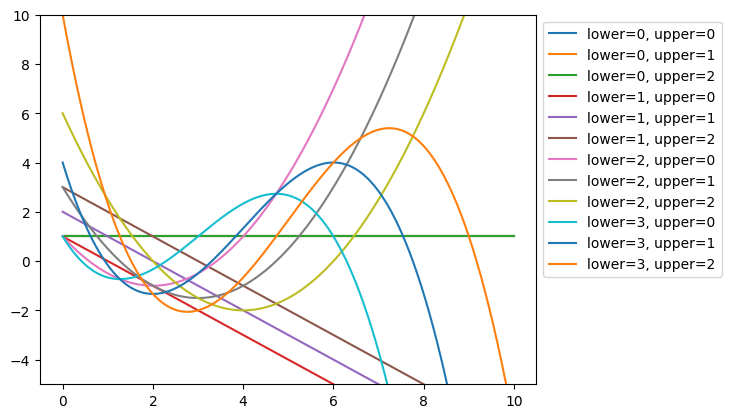

In [47]:
plt.close()

dr = 0.01
r = np.arange(0, 10, dr)
for i in range(0, 4):
    for j in range(0, 3):
        y = GLP(r, i, j)
        plt.plot(r, y, label=f"lower={i}, upper={j}")
    
plt.ylim(-5, 10)
plt.legend(bbox_to_anchor=(1, 1.0))
plt.show()

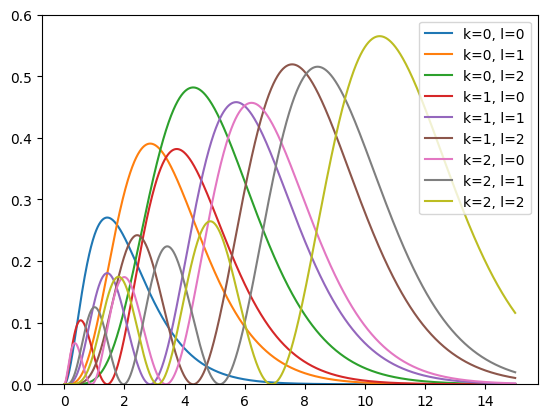

In [102]:

plt.close()
q = 0.7
dx = 0.01
x = np.arange(0, 15, dx)
for k in range(0, 3):
    for l in range(0, 3):
        y = Skl(x, k, l, q)
        plt.plot(x, np.abs(y)**2, label=f"k={k}, l={l}")
    
plt.ylim(0, 0.6)
plt.legend()
plt.show()


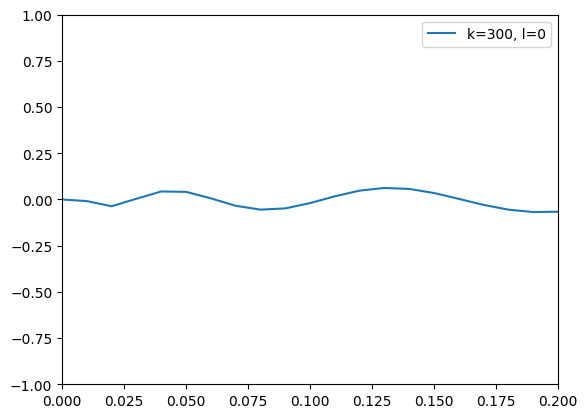

In [103]:
plt.close()

k = 300
l = 0

q = 0.7
dx = 0.01
x = np.arange(0, 1, dx)

y = Skl(x, k, l, q)
plt.plot(x, y, label=f"k={k}, l={l}")

plt.ylim(-1, 1)
plt.xlim(0, 0.2)
plt.legend()
plt.show()

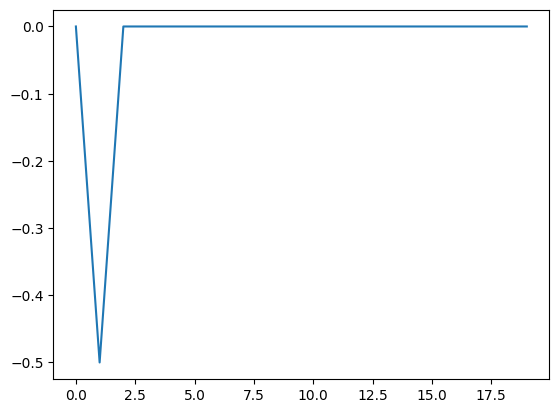

In [219]:
k1, k2 = 1, 1 # k1+1 i k1-1
l1, l2 = 0, 0
q = 0.7

dr = 0.01

s = 0
r = np.arange(0.0001, 100, dr)

s_list = []

for k2 in range(0, 20):
    s_list.append((Skl(r, k1, l1, q)*(-1/r)*Skl(r, k2, l2, q)*dr).sum())

plt.plot(s_list)

In [60]:
k1, k2 = 1, 1
l1, l2 = 1, 1

y = (Skl(r, k1, l1, q)*Skl(r, k2, l2, q)*dr).sum()

print(y)

1.4999999999999996


In [4]:
def V(r):
    # return V1(r)
    return -1 / r


def Z(z, r):
    a1 = 2.47718079
    a2 = 1.84150932
    a3 = -0.02169712
    a4 = -0.11988362
    return 1 + (z - 1) * np.exp(-a1 * r) - r * (a3 + a4 * r) * np.exp(-a2 * r)


def V1(r):
    z = 3
    alpha_c = 0.1923
    rc = 0.61340824

    return -(Z(z, r)) / r - (alpha_c / (2 * r**4)) * (1 - (np.exp(-((r / rc) ** 6))))

In [6]:
def HB(N, l, q, r_min, r_max, Nr):
    print(f"H,B calculation for N={N}")
    
    x = np.linspace(np.sqrt(r_min), r_max, Nr+1)
    
    r1 = (x**2)/r_max
    # r1 = r_max*((1 - np.cos(np.pi*(x/r_max)))/2.0)
    r = r1[0:-1]
    dr = r1[1:]-r

    B = np.zeros((N, N))
    H = np.zeros((N, N))
    
    S = np.zeros((N, r.shape[0]))
    S_diff = np.zeros((N, r.shape[0]))
    V_r = V(r)

    print("Sturmian Calculation...")
    
    for n in tqdm(range(N)):
        Sn = Skl(r1, n, l, q)
        S[n] = Sn[0:-1]
        S_diff[n] = np.diff(Sn)/dr
        
    print("H, B Calculation...")

    for n in tqdm(range(N)):
        for k in range(N):
            
            B[n, k] = (S[n] * S[k] * dr).sum()
                
            H[n, k] = (
                (
                    (1/2)*S_diff[n]*S_diff[k] + 
                    S[n]*S[k]*(V_r + (l)*(l+1)/(2*r**2))
                )
                * dr
            ).sum()
            
    return H, B

In [ ]:
# def HBa(N, l, q, r_min, r_max, Nr):
#     print(f"H,B calculation for N={N}")
    
#     B = np.zeros((N, N))
#     H = np.zeros((N, N))
    
#     dr = 10**-10

#     def Bnk(r, n, k):
#         r = np.array(r)
#         return Skl(r, n, l, q)*Skl(r, k, l, q)
    
#     def Hnk(r, n, k):
#         r = np.array(r)
#         return (1/2)*((Skl(r+dr, n, l, q)-Skl(r, n, l, q))/dr)*((Skl(r+dr, k, l, q)-Skl(r, k, l, q))/dr) + Skl(r, n, l, q)*Skl(r, k, l, q)*(V(r) + (l)*(l+1)/(2*r**2))

#     for n in tqdm(range(N)):
#         for k in range(N):
            
#             B[n, k] = sp.integrate.quad(lambda r: Bnk(r, n, k), r_min, r_max)[0]
                
#             H[n, k] = sp.integrate.quad(lambda r: Hnk(r, n, k), r_min, r_max)[0]
            
#     return H, B

In [15]:
N = 100
l = 0
q = 0.7

r_min = 0.0000001
r_max = 500
Nr = 100000

In [30]:
energies2 = []


exponents = np.arange(2, 10, 1)
for exponent in tqdm(exponents):
    Nr = 10**exponent
    H, B = HB(N, l, q, r_min, r_max, Nr)
    eigenvalues, eigenvectors = sp.linalg.eigh(H, B)
    eigenvalues.sort()
    energies2 += [eigenvalues[0]]

plt.plot(exponents, energies2)
plt.legend()
plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

H,B calculation for N=10
Sturmian Calculation...


100%|██████████| 10/10 [00:00<00:00, 3141.57it/s]


H, B Calculation...


100%|██████████| 10/10 [00:00<00:00, 2177.28it/s]


H,B calculation for N=10
Sturmian Calculation...


100%|██████████| 10/10 [00:00<00:00, 2187.15it/s]


H, B Calculation...


100%|██████████| 10/10 [00:00<00:00, 2406.51it/s]


H,B calculation for N=10
Sturmian Calculation...


100%|██████████| 10/10 [00:00<00:00, 1932.24it/s]


H, B Calculation...


100%|██████████| 10/10 [00:00<00:00, 722.57it/s]


H,B calculation for N=10
Sturmian Calculation...


100%|██████████| 10/10 [00:00<00:00, 169.18it/s]


H, B Calculation...


 50%|█████     | 4/8 [00:00<00:00, 13.74it/s]

H,B calculation for N=10
Sturmian Calculation...


100%|██████████| 10/10 [00:00<00:00, 16.32it/s]


H, B Calculation...


100%|██████████| 10/10 [00:01<00:00,  5.44it/s]


H,B calculation for N=10
Sturmian Calculation...


100%|██████████| 10/10 [00:05<00:00,  1.72it/s]


H, B Calculation...


 75%|███████▌  | 6/8 [00:25<00:10,  5.22s/it]

H,B calculation for N=10
Sturmian Calculation...


 75%|███████▌  | 6/8 [01:43<00:34, 17.17s/it]


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (8,) and (6,)

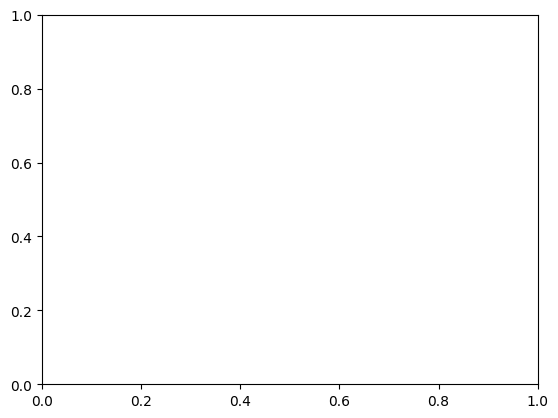

In [31]:
plt.plot(exponents, np.log(-np.array(energies2)-0.5))
plt.legend()
plt.show()

In [32]:
energies2

[-0.6180131707808375,
 -0.5089754244377485,
 -0.5008778976955901,
 -0.5000875994534147,
 -0.5000087584040868,
 -0.5000008761813238]

  0%|          | 0/9 [00:00<?, ?it/s]

H,B calculation for N=2
Sturmian Calculation...


100%|██████████| 2/2 [00:00<00:00, 346.18it/s]


H, B Calculation...


100%|██████████| 2/2 [00:00<00:00, 334.67it/s]


H,B calculation for N=3
Sturmian Calculation...


100%|██████████| 3/3 [00:00<00:00, 358.08it/s]


H, B Calculation...


100%|██████████| 3/3 [00:00<00:00, 226.46it/s]


H,B calculation for N=4
Sturmian Calculation...


100%|██████████| 4/4 [00:00<00:00, 286.08it/s]


H, B Calculation...


 33%|███▎      | 3/9 [00:00<00:00, 26.88it/s]

H,B calculation for N=5
Sturmian Calculation...


100%|██████████| 5/5 [00:00<00:00, 321.02it/s]


H, B Calculation...


100%|██████████| 5/5 [00:00<00:00, 175.39it/s]


H,B calculation for N=6
Sturmian Calculation...


100%|██████████| 6/6 [00:00<00:00, 303.80it/s]


H, B Calculation...


100%|██████████| 6/6 [00:00<00:00, 139.43it/s]


H,B calculation for N=7
Sturmian Calculation...


100%|██████████| 7/7 [00:00<00:00, 281.38it/s]


H, B Calculation...


 67%|██████▋   | 6/9 [00:00<00:00, 16.72it/s]

H,B calculation for N=8
Sturmian Calculation...


100%|██████████| 8/8 [00:00<00:00, 309.68it/s]


H, B Calculation...


100%|██████████| 8/8 [00:00<00:00, 114.88it/s]


H,B calculation for N=9
Sturmian Calculation...


100%|██████████| 9/9 [00:00<00:00, 249.02it/s]


H, B Calculation...


 89%|████████▉ | 8/9 [00:00<00:00, 11.92it/s]

H,B calculation for N=10
Sturmian Calculation...


100%|██████████| 10/10 [00:00<00:00, 226.27it/s]


H, B Calculation...


100%|██████████| 9/9 [00:00<00:00, 11.62it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


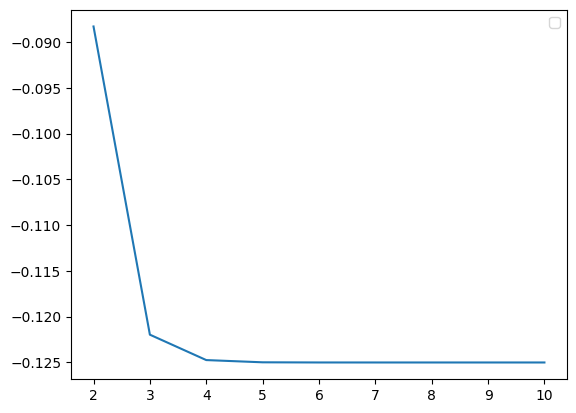

In [18]:
energies = []

N_list = [2, 3, 4, 5, 6, 7, 8, 9 , 10]
# 120, 140, 160, 180, 230, 260, 290, 300, 320, , 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 
#

for N in tqdm(N_list):
    H, B = HB(N, l, q, r_min, r_max, Nr)
    eigenvalues, eigenvectors = sp.linalg.eigh(H, B)
    eigenvalues.sort()
    energies += [eigenvalues[1]]

plt.plot(N_list, energies)
plt.legend()
plt.show()

In [125]:
energies

[-0.08825212321105885,
 -0.12195952156916892,
 -0.12473707378440588,
 -0.12498162526446326,
 -0.12499911389942074,
 -0.12500015845427787,
 -0.12500021346559456,
 -0.12500021610925927,
 -0.125000216228706]

In [61]:
N_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,15, 20, 30, 40] # 
# 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 230, 260, 290, 300, 320

for N in tqdm(N_list):
    H, B = HB(N, l, q, r_min, r_max, Nr)
    eigenvalues, eigenvectors = sp.linalg.eigh(H, B)
    eigenvalues.sort()
    plt.plot(range(N), np.abs(eigenvalues+(1/np.array(range(1, N+1))**2)), label=f"N={N}")

plt.ylim(-0.2, 2)
plt.xlim(-1, 10)
plt.legend()
plt.show()

  0%|          | 0/14 [00:00<?, ?it/s]

H,B calculation for N=1


ValueError: operands could not be broadcast together with shapes (100000,) (0,) 

ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

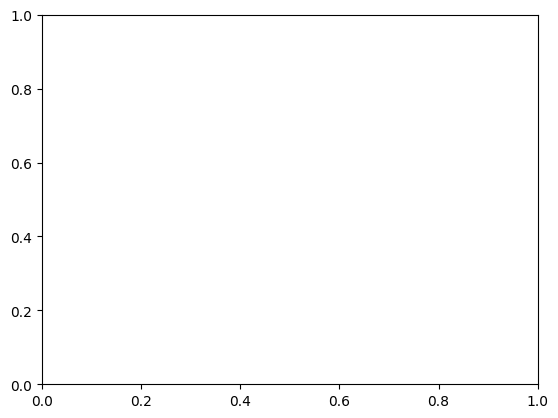

In [253]:
plt.plot(N_list, energies)

In [16]:
H, B = HB(N, l, q, r_min, r_max, Nr)

H,B calculation for N=100
Sturmian Calculation...


100%|██████████| 100/100 [00:01<00:00, 61.79it/s]


H, B Calculation...


100%|██████████| 100/100 [00:09<00:00, 10.40it/s]


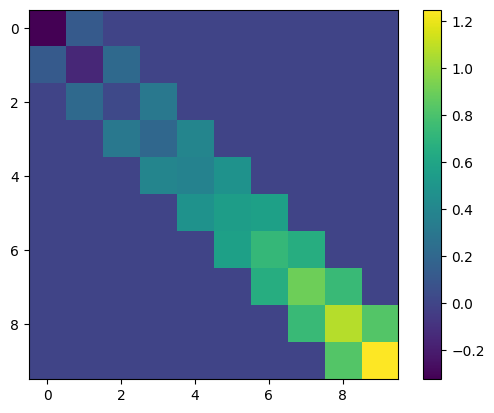

In [83]:
plt.imshow(H)
plt.colorbar()

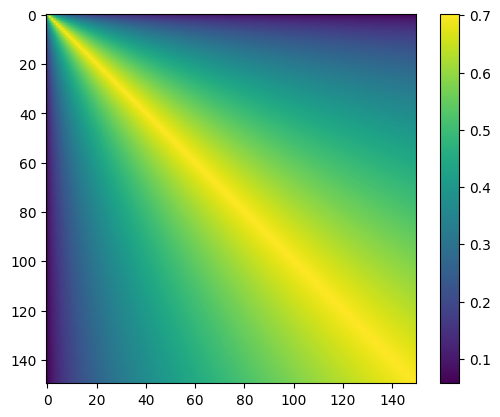

In [29]:
plt.imshow(B)
plt.colorbar()

In [17]:
eigenvalues, eigenvectors = sp.linalg.eigh(H, B)
eigenvalues.sort()

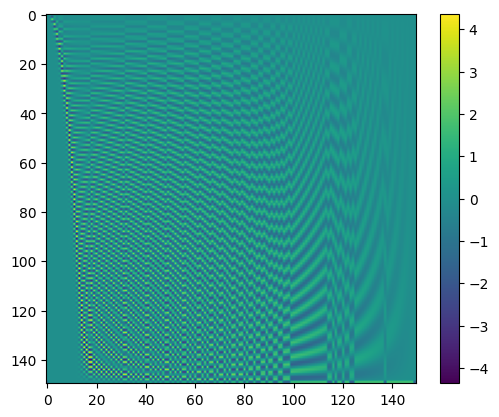

In [32]:
plt.imshow(eigenvectors)
plt.colorbar()

0.0625

In [33]:
eigenvalues

array([-2.17804822e+05, -4.99198511e-01, -1.24905878e-01, -5.55287292e-02,
       -3.12390015e-02, -1.99944956e-02, -1.38857635e-02, -1.02021454e-02,
       -7.81121926e-03, -6.17195311e-03, -4.99934873e-03, -4.13172350e-03,
       -3.47187204e-03, -2.95755135e-03, -2.53135872e-03, -2.09474998e-03,
       -1.57434872e-03, -9.63592027e-04, -2.69428672e-04,  5.03296564e-04,
        1.35181726e-03,  2.27435366e-03,  3.26996680e-03,  4.33824695e-03,
        5.47914107e-03,  6.69292817e-03,  7.98003361e-03,  9.34121816e-03,
        1.07773014e-02,  1.22892876e-02,  1.38784445e-02,  1.55460707e-02,
        1.72935623e-02,  1.91226313e-02,  2.10349343e-02,  2.30323215e-02,
        2.51168415e-02,  2.72906382e-02,  2.95559313e-02,  3.19152281e-02,
        3.43709932e-02,  3.69260726e-02,  3.95832051e-02,  4.23456032e-02,
        4.52162895e-02,  4.81988967e-02,  5.12968395e-02,  5.45140361e-02,
        5.78544223e-02,  6.13222777e-02,  6.49219988e-02,  6.86583702e-02,
        7.25363073e-02,  